<a href="https://colab.research.google.com/github/Julian27R/Trabajos/blob/main/4_Transformada_Laplace/4_Transformada%20inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada inversa de Laplace

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Transformada Inversa

- La transformada de Laplace también tiene una [transformada inversa](https://en.wikipedia.org/wiki/Inverse_Laplace_transform). La transformada inversa de Laplace convierte una transformada de Laplace compleja $X(s) \in \mathbb{C}$ en una señal compleja $x(t) \in \mathbb{C}$ con variable independiente real $t \in \mathbb{R}$.

- Puede demostrarse que la transformada inversa de Laplace $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$ se determina de forma única.

### Fórmula Integral

Usando los resultados del análisis complejo, la transformada inversa de Laplace viene dada por la siguiente integral de línea compleja:

\begin{equation}
x(t) = \frac{1}{2 \pi j} \int_{\sigma - j \infty}^{\sigma + j \infty} X(s) \, e^{s t} \; ds
\end{equation}
donde se asume que $X(s) = \mathfrak{L} \{ x(t) \}$  es analítica en su ROC. La notación $\sigma \mp j \infty$ para los límites de integración denota una región arbitraria de integración que descansa en la ROC y para $\Im \{s\} = - \infty$ a $\Im \{s\} = + \infty$.

La ruta de integración se puede elegir paralela al eje imaginario, pero también son posibles todas las demás rutas en la ROC. Esto resulta del [teorema de integral de Cauchy](https://en.wikipedia.org/wiki/Cauchy's_integral_theorem).

### Transformadas de Laplace racionales

El cálculo de la transformada inversa de Laplace mediante la integral puede ser trabajoso.

El [teorema del residuo de Cauchy](https://en.wikipedia.org/wiki/Residue_theorem) da una solución práctica para las transformadas de Laplace $X(s) = \mathfrak{L} \{ x(t) \}$ que están dadas como funciones racionales.

Establece que el valor de una integral de línea de una función holomórfica sobre un contorno cerrado se da al resumir sus [residuos](https://en.wikipedia.org/wiki/Residue_theorem).

El residuo es el valor de la integral de línea para una ruta que encierra una singularidad. En consecuencia, la transformada inversa de Laplace de una transformada de Laplace racional se puede calcular sumando las contribuciones individuales de sus polos.

#### Procedimiento básico

Una transformada de Laplace  $X(s)$ racional puede ser escrita en términos de polinomios en el numerador y en el denominador:

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n}
\end{equation}
donde $M$, $N$ son el orden de los polinomios del numerador y del denominador y $\beta_m$, $\alpha_n$ son sus coeficientes, respectivamente.

Se asume que $\alpha_N \neq 0$ y que $M \leq N$. Si $M > N$, $X(s)$  se puede descomponer por [división polinomial](https://en.wikipedia.org/wiki/Polynomial_long_division) dentro de una suma de potencias de $s$ y una función racional cumpliendo que $M \leq N$.

Ahora, la [descomposición en fracciones parciales](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) de $X(s)$ se puede escribir como:

\begin{equation}
X(s) = A_0 + \sum_{\mu = 1}^{L} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu}}{(s - s_{\infty \mu})^\nu}
\end{equation}
donde $s_{\infty \mu}$ es el $\mu$-th polo único de $X(s)$, $R_\mu$ su grado y $L$ el número total de polos $\mu = \{1, \dots, L\}$.

Utilizando las transformadas conocidas de Laplace (Ver [tablas de transformadas](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/Laplace_Table.pdf)), por ejemplo:

\begin{equation}
\mathfrak{L} \{ t^n e^{-s_0 t} \epsilon(t) \} = \frac{n!}{(s + s_0)^{n+1}} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

y $\mathfrak{L} \{ \delta(t) \} = 1$, junto con la linealidad de la transformada de Laplace, resulta en una expresión genérica para la transformada inversa $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$

\begin{equation}
x(t) = A_0 \cdot \delta(t) + \epsilon(t) \sum_{\mu = 1}^{L} e^{s_{\infty \mu} t} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu} \, t^{\mu - 1}}{(\nu -1)!}
\end{equation}

Sin embargo, se deben calcular los coeficientes $A_0$ y $A_{\mu \nu}$ de la descomposición en fracciones parciales.

El coeficiente constante $A_0$ está dado por:

\begin{equation}
A_0 = \lim_{s \to \infty} X(s)
\end{equation}

Para un polo $s_{\infty \mu}$ con grado $R_\mu = 1$, el coeficiente $A_{\mu 1}$ es:

\begin{equation}
A_{\mu 1} = \lim_{s \to s_{\infty \mu}} \left( X(s) \cdot (s - s_{\infty \mu}) \right)
\end{equation}

Para un polo $s_{\infty \mu}$ de grado $R_\mu > 1$, los coeficientes $A_{\mu \nu}$ son:

\begin{equation}
A_{\mu \nu} = \frac{1}{(R_\mu - \nu)!} \lim_{s \to s_{\infty \mu}} \frac{d^{R_\mu - \nu}}{d s^{R_\mu - \nu}} \left( X(s) \cdot (s - s_{\infty \mu})^{R_\mu} \right)
\end{equation}

#### Clasificación de polos

- El anterior procedimiento permite calcular la transformada inversa de Laplace $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$ de una transfromada de Laplace racional $X(s)$ de manera mecánica.

- Es muy adecuado para una realización algorítmica. Sin embargo, para el cálculo manual puede ser más eficiente clasificar los polos con respecto a su ubicación en el plano $ s $ y sus simetrías.

- La clasificación se puede usar para formular una descomposición de fracción parcial modificada que limita la necesidad de una posterior simplificación algebraica de la transformada de Laplace inversa.

- Tres clases de polos son comunmente considerados:

| Tipo | Diagrama de Polos y Ceros | $X(s)$ | $x(t) = \mathfrak{L}^{-1} \{ X(s) \} \qquad \qquad$ |
|---|:---:|:---:|:---:|
| Un polo complejo | ![Un polo](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/single_pole.png?raw=1) | $\frac{n!}{(s + s_0)^{n+1}}$ | $t^n e^{-s_0 t} \epsilon(t)$ |
| Polos imaginarios conjugados| ![Imaginarios conjugados](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/conjugated_imaginary_poles.png?raw=1) | $\frac{A s + B}{s^2 + \omega_0^2}$ | $\begin{cases} \sin(\omega_0 t) \epsilon(t) \\ \cos(\omega_0 t) \epsilon(t) \end{cases}$ |
| Polos complejos conjugados| ![Complejos conjugados](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/conjugated_complex_poles.png?raw=1) | $\frac{A s + B}{(s + \sigma_0)^2 + \omega_0^2}$ | $\begin{cases} e^{-\sigma_0 t} \sin(\omega_0 t) \epsilon(t) \\ e^{-\sigma_0 t} \cos(\omega_0 t) \epsilon(t) \end{cases}$ |

Donde $s_0 \in \mathbb{C}$ y $\omega_0, \sigma_0 \in \mathbb{R}$.

- Los coeficientes de expansión $A, B \in \mathbb{R}$ se pueden derivar por comparación coeficientes. Si $x(t)$ contiene un seno o un coseno, depende del coeficiente $A$.

- Si $A \neq 0$ luego $x(t)$ contiene un coseno.

#### Ejemplo - Tranformada inversa de una transformada racional de Laplace

Determine la transformada inversa $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$ de:

\begin{equation}
X(s) = \frac{2 s^2 + 14 s + 124}{s^3 + 8 s^2 + 46 s + 68} \qquad \text{for } \Re \{s \} > -2
\end{equation}

Primero se define la función $X(s)$ con `SymPy`.

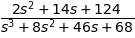

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (2*s**2 + 14*s + 124)/(s**3 + 8 * s**2 + 46*s + 68)
X

Los polos de $X(s)$ son obtenidos al calcular las raices del polinomio del denominador.

In [ ]:
poles = sym.roots(sym.denom(X))
poles

El resultado es un polo real y un par de polos complejos conjugados. De acuerdo a la clasificación de polos, se escoge el siguiente método de fracciones parciales:

\begin{equation}
X_p(s) = \frac{A}{s + 2} + \frac{B s + C}{s^2 + 6s + 34}
\end{equation}

Los coeficientes $A, B, C \in \mathbb{R}$ son obtenidos al igualar los coeficientes con $X(s)$.

In [ ]:
A, B, C = sym.symbols('A B C', real=True)
#expresión en fracciones parciales
Xp = A / (s+2) + (B*s + C)/(s**2 + 6*s + 34)
#resolver coeficientes por igualación de expresiones
coeffs = sym.solve(sym.Eq(X, Xp), (A, B, C))
coeffs

Al reemplazar los coeficientes en $X_p(s)$ resulta en:

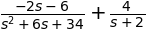

In [ ]:
Xp = Xp.subs(coeffs)
Xp

La primera fracción pertenece a los polos complejos conjugados. Al [completar el cuadrado](https://en.wikipedia.org/wiki/Completing_the_square) en el denominador, su inversa puede ser identificada en la tabla de transformadas como una señal coseno que decrece exponencialmente. Realizando la transformada inversa de Laplace con `SymPy`:

In [ ]:
x1 = sym.inverse_laplace_transform(Xp.args[1], s, t) #trasformada inversa del segundo componente
x1

La segunda fracción corresponde a un polo real de primer orden. Su transformada inversa de Laplace se puede hallar en la tabla de transformadas, la cual es una señal exponencial que decae. Realizando la transformada inversa de Laplace con `SymPy`:

In [ ]:
x2 = sym.inverse_laplace_transform(Xp.args[0], s, t)#transformada inversa del primer componente
x2

La transformada inversa de Laplace de $X(s)$ está dada por la suma de las dos partes descritas anteriormente:

In [ ]:
x = x1 + x2
x

Se grafican los resultados:

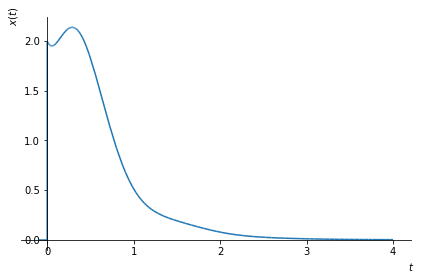

In [ ]:
sym.plot(x, (t, -0.1, 4), xlabel='$t$', ylabel='$x(t)$');

El mismo resultado se puede obtener directamente de $X(s)$ usando la transformada inversa de Laplace de `SymPy`:

Nota: la operación inversa de simpy puede ser costosa computacionalmente, se sugiere utilizar fracciones parciales para simplificar los cálculos.

In [ ]:
sym.inverse_laplace_transform(X, s, t).simplify() #sin embargo puede ser más costoso computacionalmente

**Ejercicio 1**

* Obtener la transformada inversa de Laplace de $X(s)$ manualmente.
**texto en negrita**

**SOLUCION**

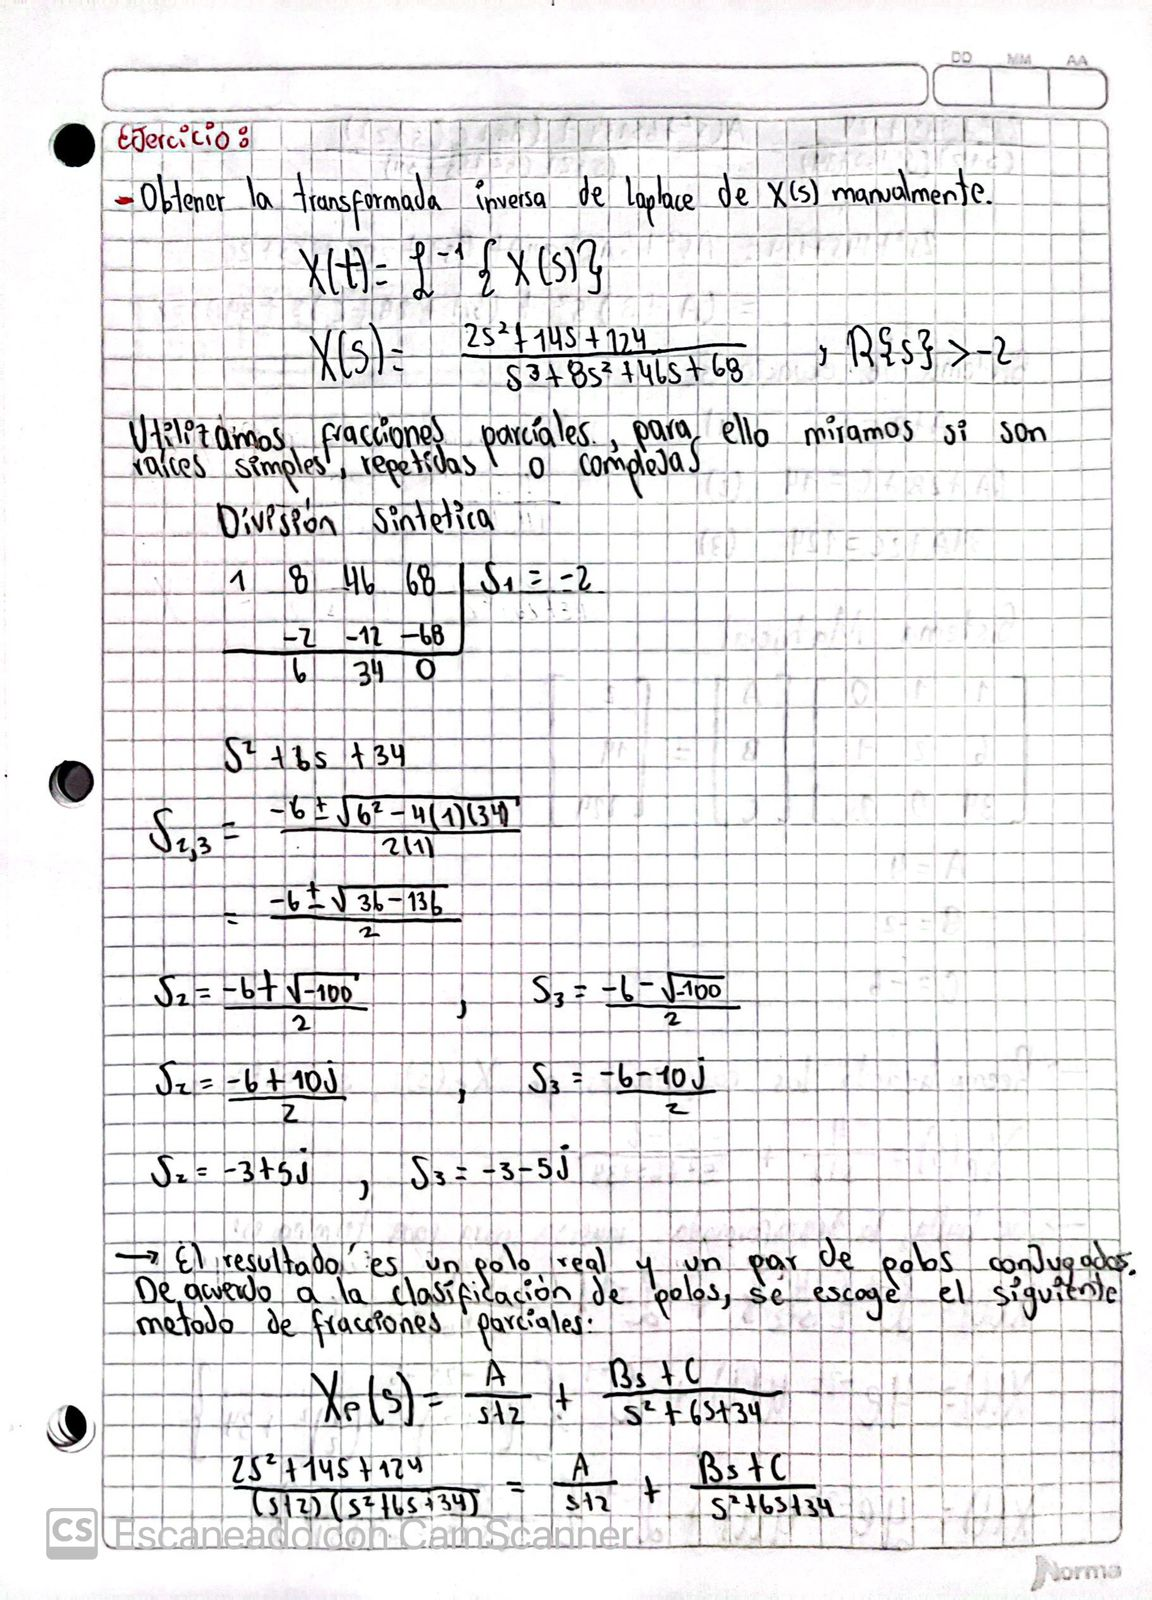

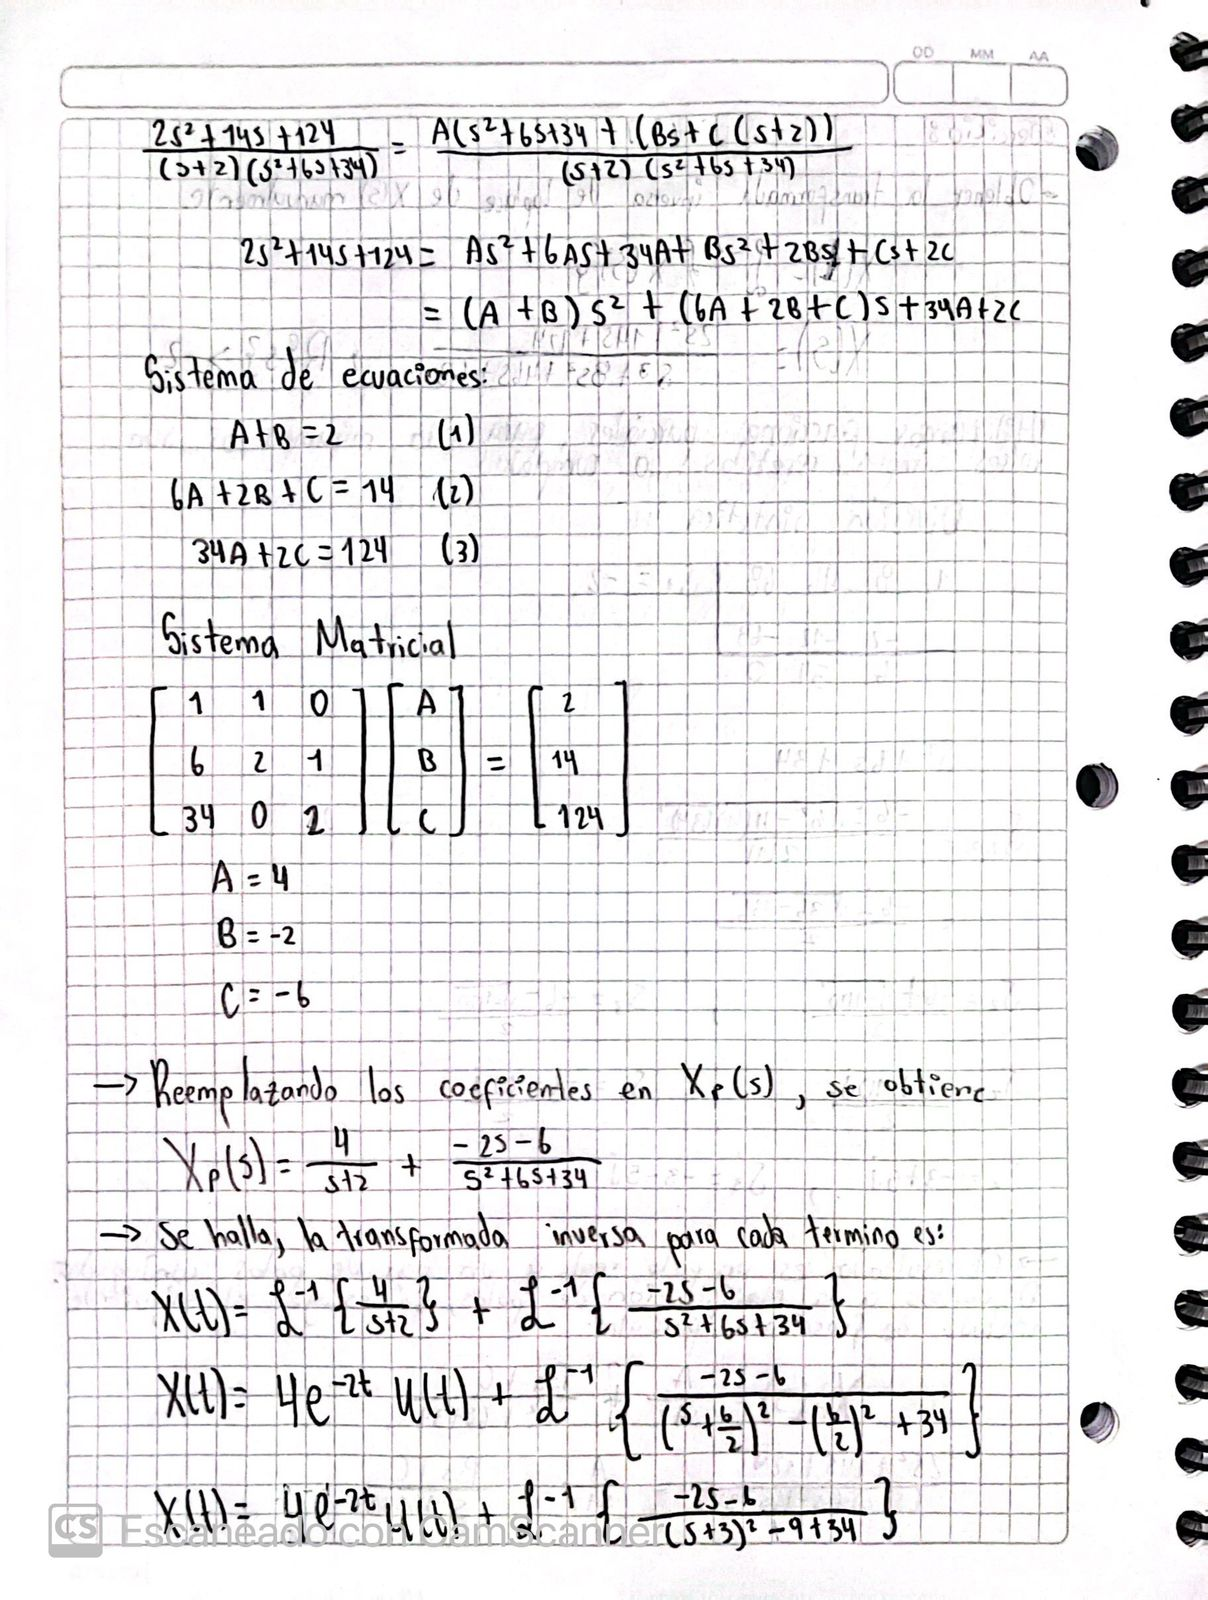

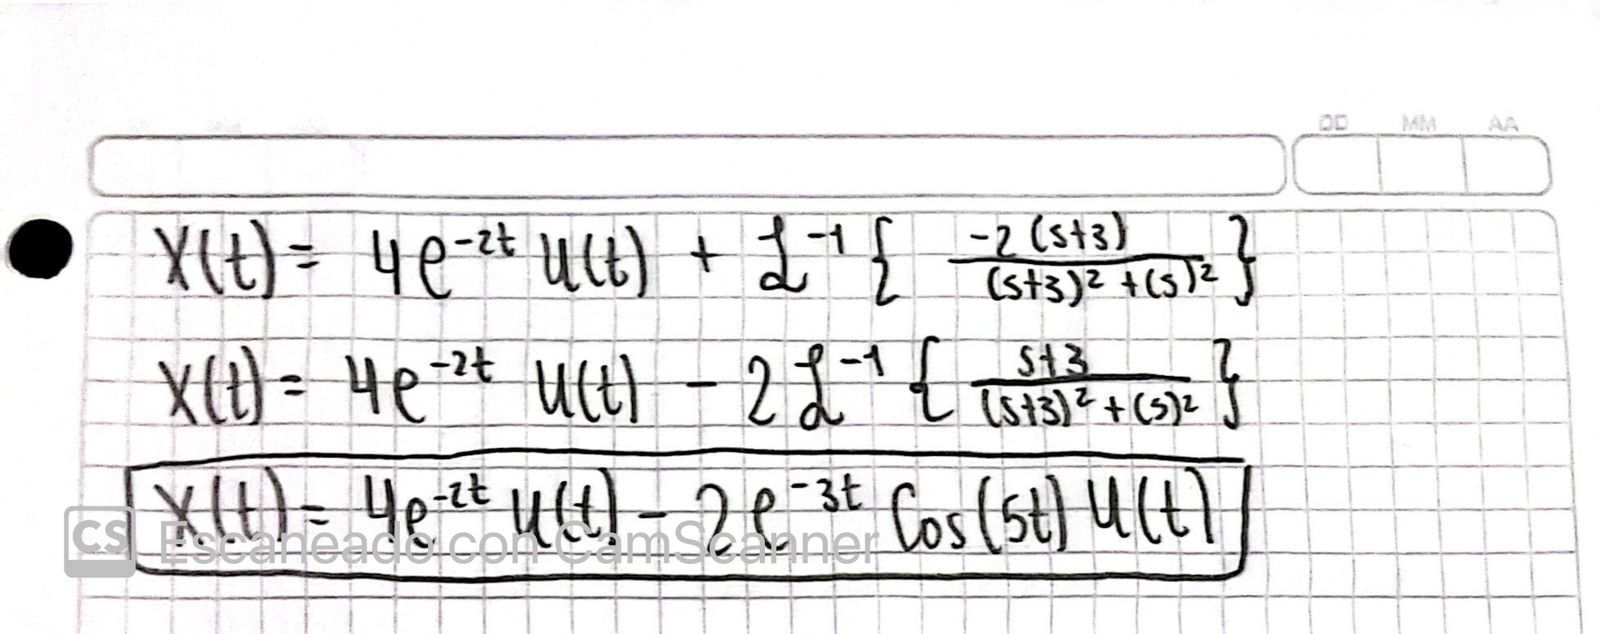

**EJERCICIO 2**
* Obtener la transformada inversa de Laplace de
    \begin{equation}
    X(s) = \frac{1}{(s+1)(s+2)^2} \qquad \text{for } \Re \{ s \} \geq -1
    \end{equation}
    manualmente. Comprobar los resultados utilizando `SymPy`.

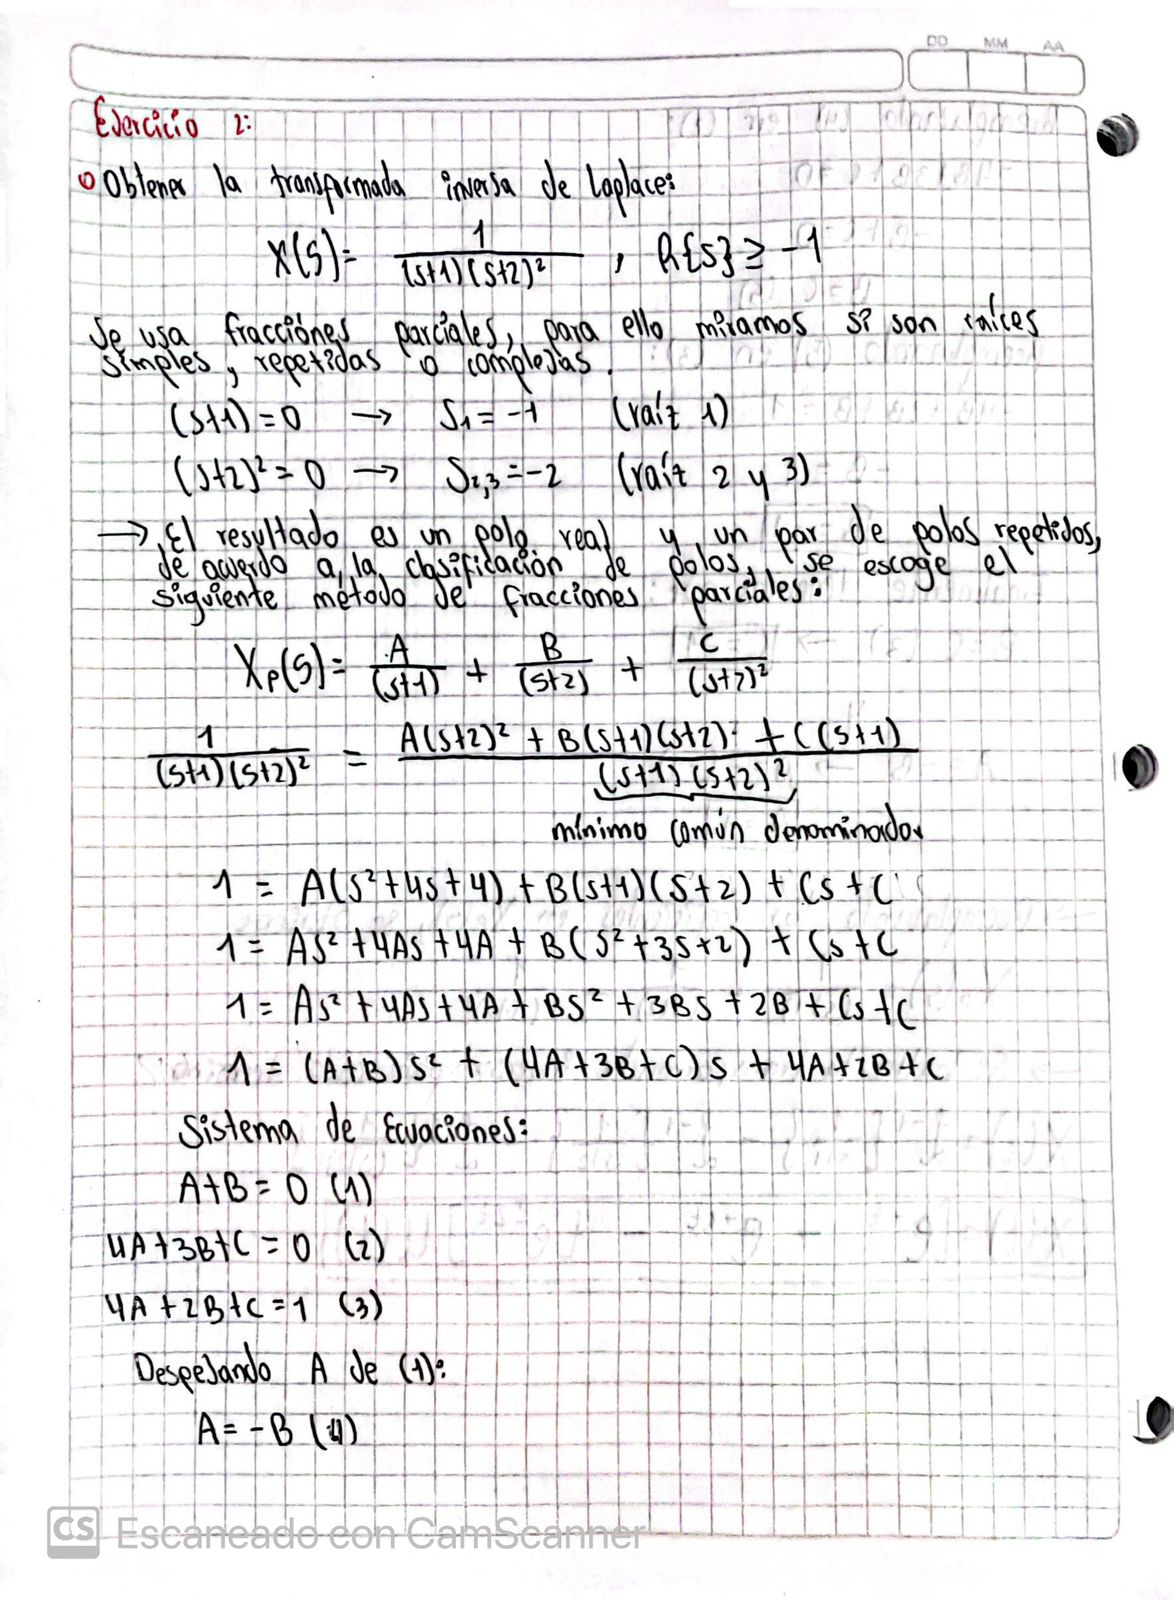

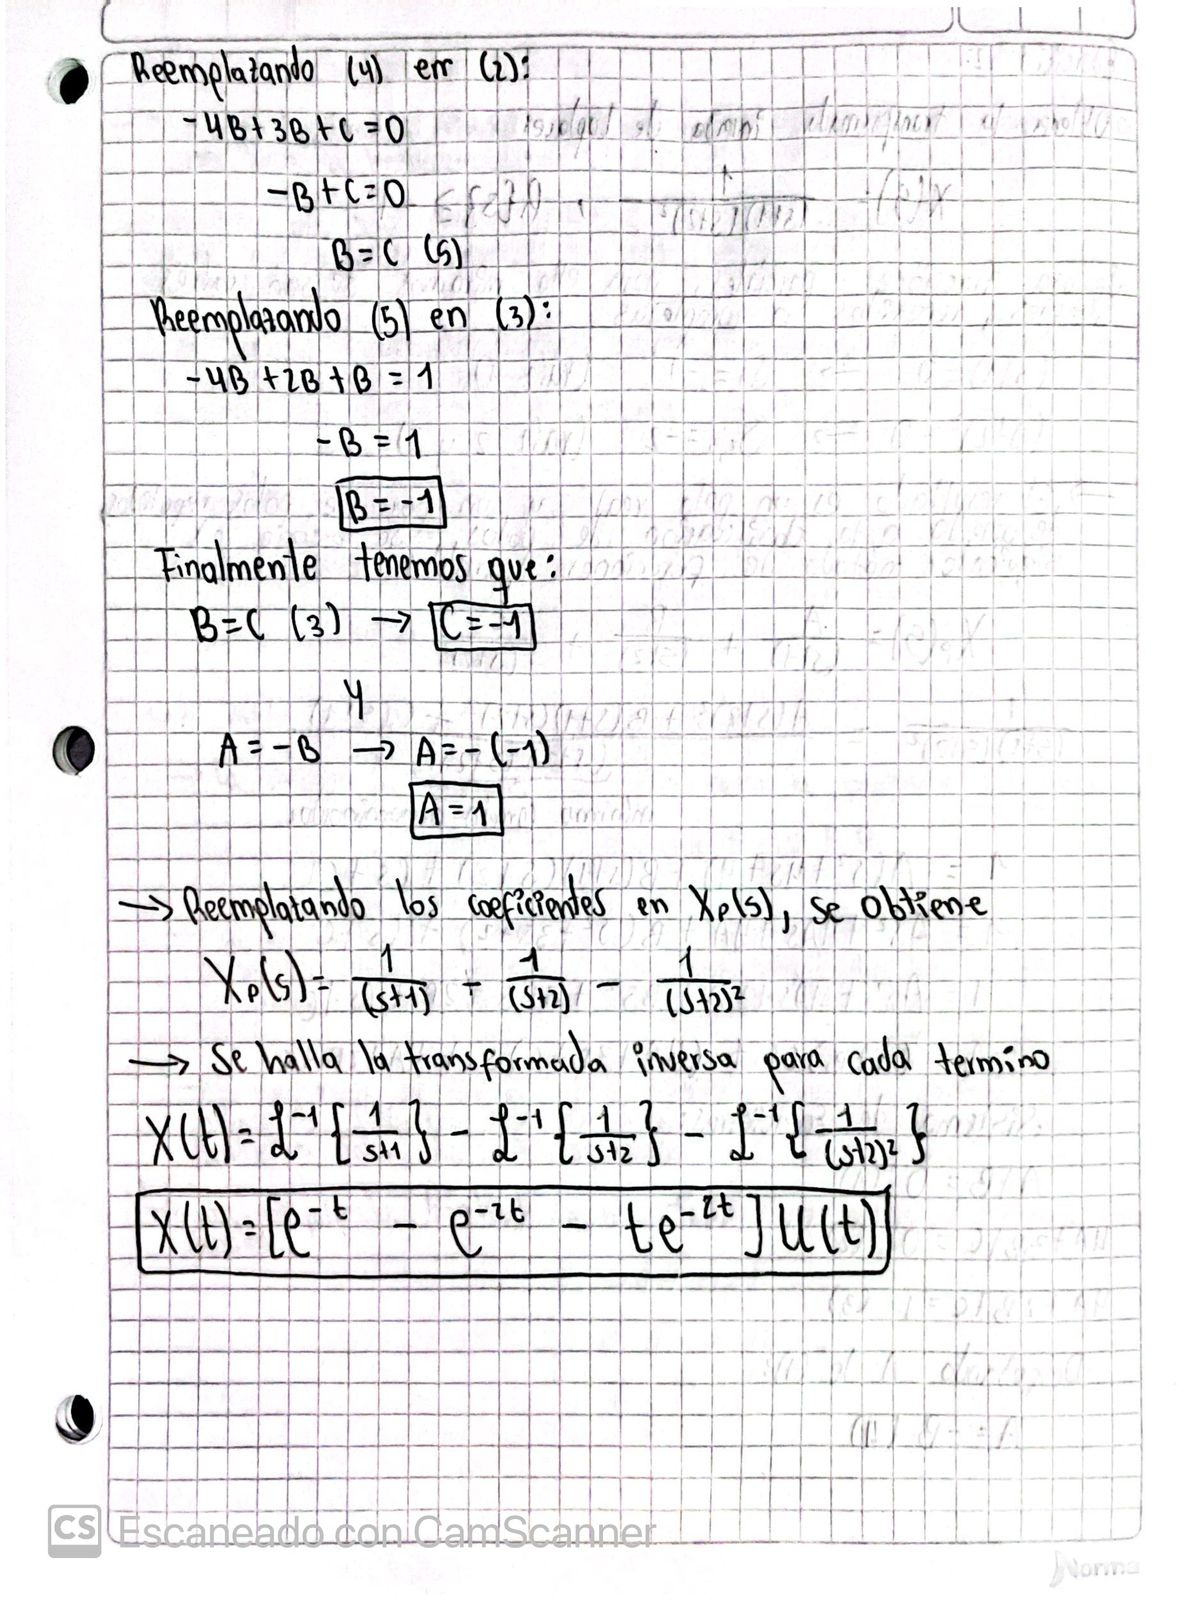

In [4]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = 1/((s + 1)*(s +2)**2)
X

       1        
────────────────
               2
(s + 1)⋅(s + 2) 

Los polos de $X(s)$ son obtenidos al calcular las raices del polinomio del denominador.

In [5]:
poles = sym.roots(sym.denom(X))
poles

{-2: 2, -1: 1}

El resultado es un polo real y un par de polos repetidos. De acuerdo a la clasificación de polos, se escoge el siguiente método de fracciones parciales:

\begin{equation}
X_p(s) = \frac{A}{s + 1} + \frac{B}{ s + 2} + \frac{C}{(s + 2)^2}
\end{equation}

Los coeficientes $A, B, C \in \mathbb{R}$ son obtenidos al igualar los coeficientes con $X(s)$.

In [6]:
A, B, C = sym.symbols('A B C', real=True)
#expresión en fracciones parciales
Xp = A / (s+1) + B / (s+2) + C / (s+2)**2
#resolver coeficientes por igualación de expresiones
coeffs = sym.solve(sym.Eq(X, Xp), (A, B, C))
coeffs

{A: 1, B: -1, C: -1}

Al reemplazar los coeficientes en $X_p(s)$ resulta en:

In [7]:
Xp = Xp.subs(coeffs)
Xp

    1        1         1  
- ───── - ──────── + ─────
  s + 2          2   s + 1
          (s + 2)         

Realizando la transformada inversa de Laplace con `SymPy`:

In [9]:
x1 = sym.inverse_laplace_transform(Xp.args[0], s, t)#transformada inversa del primer componente
x1

 -t     
ℯ  ⋅θ(t)

In [10]:
x2 = sym.inverse_laplace_transform(Xp.args[1], s, t) #trasformada inversa del segundo componente
x2

  -2⋅t     
-ℯ    ⋅θ(t)

In [11]:
x3 = sym.inverse_laplace_transform(Xp.args[2], s, t) #trasformada inversa del tercer componente
x3

    -2⋅t     
-t⋅ℯ    ⋅θ(t)

La transformada inversa de Laplace de $X(s)$ está dada por la suma de las tres partes descritas anteriormente:

In [12]:
x = x1 + x2 + x3
x

     -2⋅t         -t         -2⋅t     
- t⋅ℯ    ⋅θ(t) + ℯ  ⋅θ(t) - ℯ    ⋅θ(t)

Se grafican los resultados:

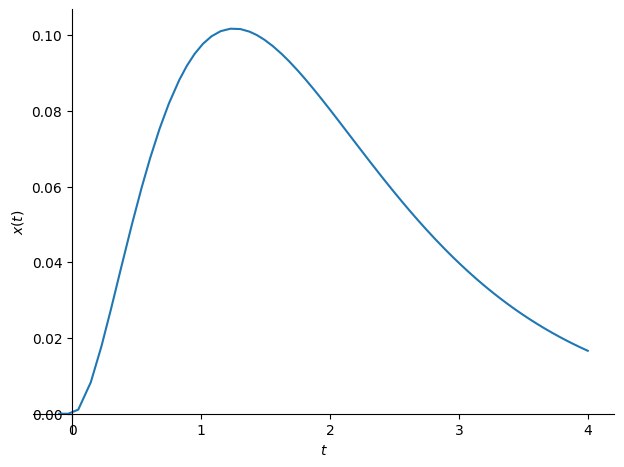

In [13]:
sym.plot(x, (t, -0.1, 4), xlabel='$t$', ylabel='$x(t)$');

El mismo resultado lo podemos obtener directamente de $X(s)$ usando la transformada inversa de Laplace de `SymPy`:


In [14]:
sym.inverse_laplace_transform(X, s, t).simplify() #sin embargo puede ser más costoso computacionalmente

⎛      t    ⎞  -2⋅t     
⎝-t + ℯ  - 1⎠⋅ℯ    ⋅θ(t)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.